# Satellite images and spectral bands

* **Special requirements:** A Google account, access to Google Earth Engine.
* **Prerequisites:** You should have completed the "1.2_ENGN3903_Introduction to Google Earth Engine" notebook.


## Background

Satellite images,
spectral bands.


***

## Aims of the practical session

The main aim of this practical session is to understand that satellite images are comprised of bands that capture different regions of the electromagnetic spectrum


***

## Description

In this notebook you'll learn about the 'layers' of a satellite image, how you can access single satellite images using GEE, and how you can use these 'layers' to highlight certain landscape features. 

First we will:
- Add a single images Landsat image of the Canberra region, and.
- Visualize each band separately. 

Then we will:
- describe certain features in each band.

Lastly, we will:
- Create composites from single images (RGB, flase color, etc)
- Compare bands and explaining when/why some bands may be useful to detect some features and not others

***

## Satellite images are comprised of several spectral bands


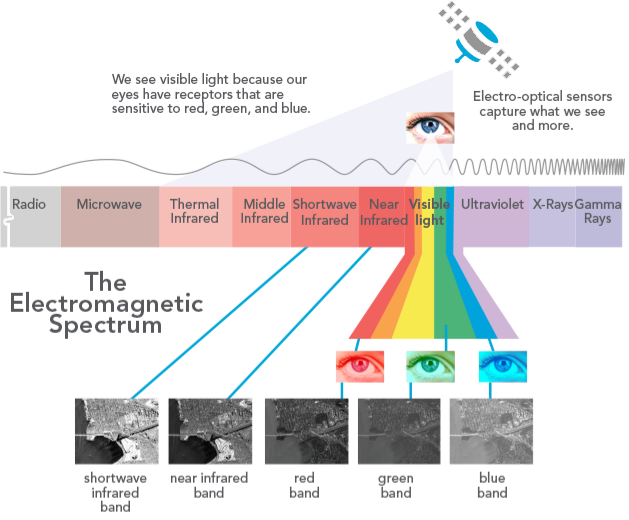
 Image source: [ESRI](https://www.esri.com/about/newsroom/wp-content/uploads/files/2016/08/04-fig-4-32.png)
.

***

## Getting started


### Load packages

Import Python packages that are used for the analysis.


In [1]:
%matplotlib inline

import geemap as gmap
import ee
import pandas as pd
import matplotlib.pyplot as plt

### Connect to Google Earth Engine (GEE)

Connect to the GEE so we can access GEE datasets and computing assets.
You may be required to input your Google account name and password. Please keep those safe and don't share them with anyone.

In [2]:
m = gmap.Map()

***

## Load a satellite image of the ACT region.


Use a Landsat 8 image.

First, let's see display the image in 'True color'. True Color means that we display the Red, Green, and Blue (RGB) bands. This makes it more intuitive to distinguish the features in the image.

You can find more information about the spectral bands of the Landsat 8 sensor [here](https://www.usgs.gov/media/images/landsat-8-band-designations)

In [3]:
# We give the 'center' location, and a 'zoom' level.
Map = gmap.Map(center=[-35,149], zoom=6)
Map.addLayerControl()
Map

Map(center=[-35, 149], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [4]:
# Select a Landsat 8 scene with little cloud cover
landsat8 = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_090084_20130723')

# Now we select the bands we want to display
landsat_vis = {'bands': ['B4', 'B3', 'B2'],
              'min': 0,
              'max': 3000}

# add the Landsat 8 image to the map.
Map.addLayer(landsat8, landsat_vis, "Landsat 8 Image 2013-07-07 ")

### Visualize individual bands, one at a time. 

From the Landsat 8 image above, let's display each band individually, starting from the Blue band.

Describe what you see in terms of:
1. what does water look like? See, for example, the sea.

1. Can you distinguish any features *in* the water?

1. Describe how buildings and other artificial structures are displayed (e.g. roads, airports, industrial complexes).

1. What does vegetation look like? Are sport fields different from forests and crops? is vegetation bright or dark?


**GEE Tip:** use the 'inspector tool' to see if water, forest, crops, artificial surfaces and other land covers have different values. 

In [5]:
# Visualize Blue band.
Map.addLayer(landsat8, {'bands':['B2'], 'min':0, 'max':3000}, 'Blue band')

In [6]:
# Visualize Green band.
Map.addLayer(landsat8, {'bands':['B3'], 'min':0, 'max':3000}, 'Green band')

In [7]:
# Visualize Red band.
Map.addLayer(landsat8, {'bands':['B4'], 'min':0, 'max':3000}, 'Red band')

Now is your turn to visualize other spectral bands in the same image.

Add the NIR, SWIR1, SWIR2, and Cirrus bands, and describe what you see using the same questions as above.

In [8]:
# Your code goes here.


***

### <a name="ex1"></a> Exercise 1 -  Understanding the spectral response of different features

Now that you know the area covered by the Landsat Image, it is time to do an exercise!

In this exercise you'll need to:

1. Navigate to the coordinates below and use the inspector tool to determine:
1. Get the values of 5-10 different pixels for that feature, and put them into your `dataframe` (see example code below).
1. Plot the values of each feature (see example code below).
1. Answer the questions below
<div class="alert alert-block alert-danger">
NEED TO REVIEW THIS QUESTIONS
**Answer the following questions:**

    >- What is the feature you're looking at?,
    >- What is the range of values for each feature in each band?
    >- Which bands are more useful to detect the presence of vegetation? why?
    >- Which bands would you use to detect bare soil? why?
    >- Does water look the same in all spectral bands?
    >- Which bands would you use to detect features *in* the water?

</div>

**Excercise tip:** Use only bands 2 - 7 for this excercise.

**Excercise tip:** Each pixel you use should have it's own row/entry. If you use 5 pixels for each land cover, there should be 5 rows for that land cover in the `dataframe`. See the code below for an example.

**Use these coordinates for the excercise:**

- (-35.0944, 149.425)
- (-35.2217, 148.771)
- (-35.31184, 149.27891)
- (-35.01788, 149.68156)
- (-35.32736, 149.17343)
- (-35.31764, 149.04186)

In [9]:
# Here, we'll create a pandas DataFrame indexed by Land Cover Type
# First, navigate to the coordinates stated above,
# Then, identify the land cover and add it to the 'landCover' list,
# Use the inspector tool to find the values of several pixels of the same land cover type,
# Add the values from the inspector tool to the 'pixelValues' dictionary

landCover = ['Water_pixel1',
             'Water_pixel2',
             'Water_pixel3',
             'Water_pixel4',
            # Add more rows if required
            ]

pixelValues = {
    'Band2': [0.3 , 0.8, 0.08, 0.0],
    'Band3': [0.5, .3, .04, .5],
    'Band4': [.2, .2, .3, .4],
    'Band7': [.1, .2, .3, .3],
        # Add other bands if required
       }

# Now we create a pandas DataFrame, using the 'data' dictionary
df = pd.DataFrame(pixelValues, index = landCover)
df

,Band2,Band3,Band4,Band7
Water_pixel1,0.30,0.50,0.2,0.1
Water_pixel2,0.80,0.30,0.2,0.2
Water_pixel3,0.08,0.04,0.3,0.3
Water_pixel4,0.00,0.50,0.4,0.3


*Note that the values in this table are made up. Fill in the table with the values you get from the Landsat image.*

Regardless of the method you use to create the table (i.e. `pandas` or excel or something else), your table should look like the one above: with 5-10 rows for each land cover type, where each row represents a pixel you inspected.

Now we need to plot the table. We'll use [Matplotlib](https://matplotlib.org/) to create a figure, an then we'll plot the values of each row (i.e. pixel) independently.

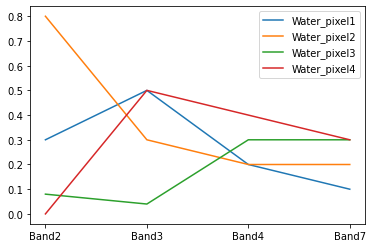

In [10]:
fig, ax = plt.subplots()

# We plot the data on each row independently
for index, row in df.iterrows():
    ax.plot(row, label = row.name)
plt.legend()
plt.show()


In [11]:
# Your code goes here.



**The answers to the questions go here.**


.



***

## Band Combinations

The previous exercise showed you that features in an image look different in different bands. Some bands are better to detect the presence (or absence) of a feature.
For example, the Near Infrared (NIR) and Short-Wave Infrared (SWIR) bands are very useful to detect vegetation, and water. We can combine these bands to create 'color composites' (a.k.a false color images). A false color image is used to reveal or enhance features otherwise invisible or poorly visible to a human eye.

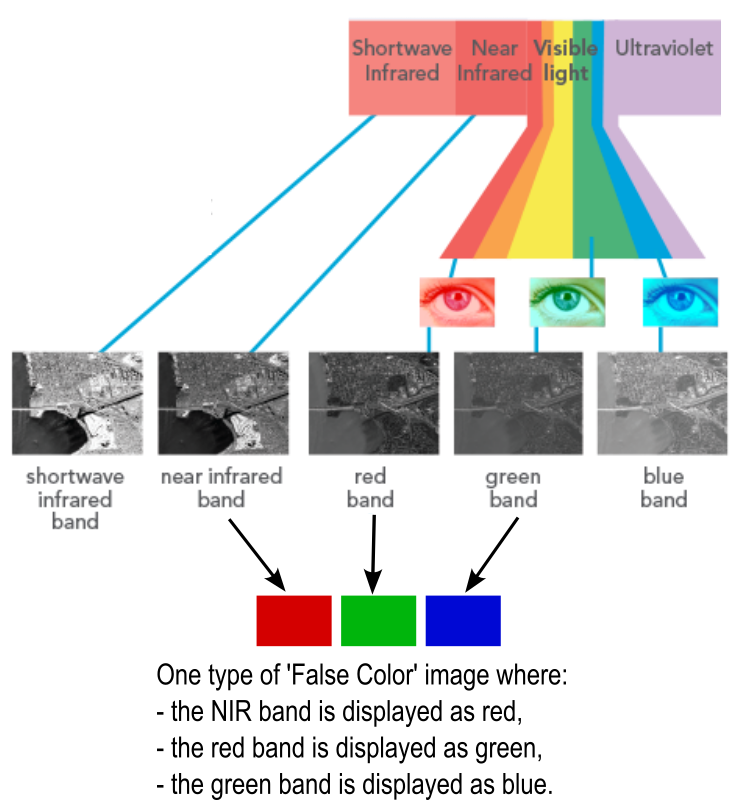

Let's see what this band combination looks like in the satellite image.

In [13]:
# Select the bands we want to display for the false color composite
falseColor = {'bands': ['B5', 'B4', 'B3'], 'min':0, 'max':3300}

# add the false color image to the map.
Map.addLayer(landsat8, falseColor, "False Color NIR,R,G ")
Map

Map(bottom=10194.0, center=[-35, 149], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

Using this band combination, which landscape features are most obvious?

Revisit the coordinates from Exercise 1, and describe what the features look like using this band combination. Why do you think some features are brighter than others? Which features are darkest?

### <a name="ex2"></a> Exercise 2 -  False color images

It is your turn to create some false color images.

Create false color images using the following bands, and answer the questions below:

- [SWIR1, NIR, Green]
- [SWIR2, SWIR2, Red]
- [SWIR1, NIR, Blue]
- [NIR, SWIR1, Red]

<div class="alert alert-block alert-danger">
NEED TO REVIEW THIS QUESTIONS

**Answer the following questions:**
>- Which band detect the presence of vegetation? why?
>- Which bands would you use to detect bare soil? why?
>- Does water look the same in all spectral bands?
>- Which bands would you use to detect water?
>- Which bands or band combination is best for detecting clouds and cloud shadows?
>- There are many bodies of water in this image (Lakes, rivers, the sea), and they all look slightly diffetent to one another. Can you explain why they look so different?

</div>

In [ ]:
# Your code goes here - [SWIR1, NIR, Green]


In [ ]:
# Your code goes here - [SWIR2, SWIR2, Red]


In [ ]:
# Your code goes here - [SWIR1, NIR, Blue]


In [ ]:
# Your code goes here - [NIR, SWIR1, Red]


**The answers to the questions go here.**


.

***

## Spectral signatures



A spectral signature is the typical spectral curves for different land covers.
For example, typical spectral signatures for soil, dry grass and green plant material are shown in the figure below. The shaded areas represent the regions detected by the Landsat TM/ETM+ sensors.

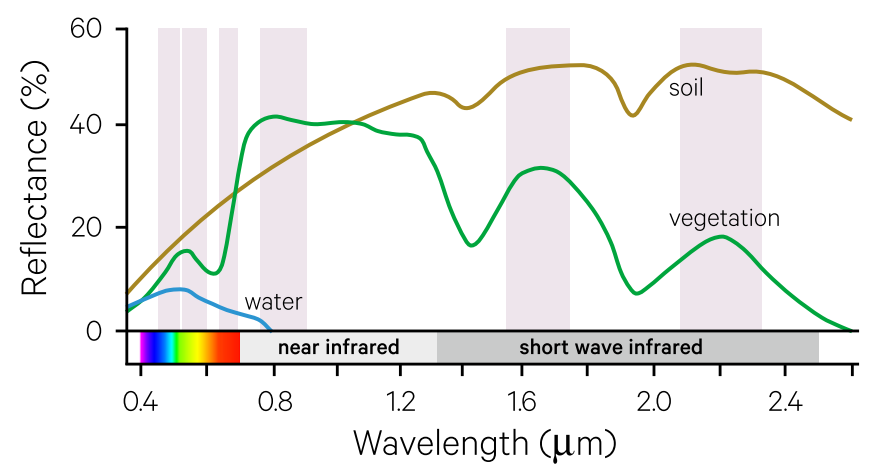
Image source: CRCSI (2016) Earth Observation: Data, Processing and Applications. Volume 1A: Data—Basics and
Acquisition.

it's important to understand that the ‘spectral sigantures’ in the figure above were drawn using data at a much finer  spectral resolution than those provided by Landsat, Sentinel, or MODIS sensors.


When using few spectral bands, the spectral signatures look a bit different. The figure below shows how the Landsat TM/ETM+ sensors 'see' soil, dry grass and green plant material.

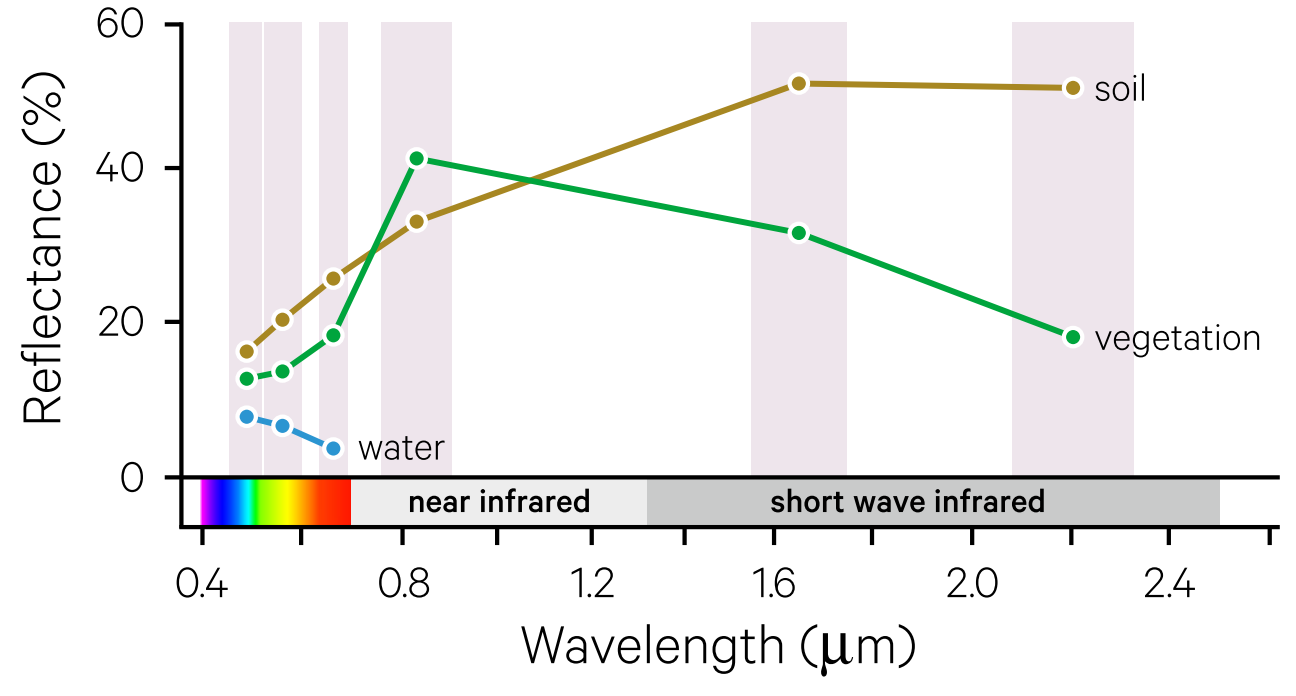

Image source: CRCSI (2016) Earth Observation: Data, Processing and Applications. Volume 1A: Data—Basics and
Acquisition.


In Exercise 1 you created a plot with different land cover types.
In the cell below describe any similarities and differences between your plot and the ones above. 

**The answers to the questions go here.**


.

<div class="alert alert-block alert-danger">
## Challenge idea


**Challenge: do the same but with Sentinel or MODIS images**
    
</div>

***

## References and useful readings

- Chapters 12, 13, and 14 form the "Earth Observation: Data, Processing and Applications" book, Volume 1A: Data—Basics and Acquisition". Available through Wattle, or  http://www.crcsi.com.au/earth-observation-series.
- https://geemap.org/
- http://dx.doi.org/10.1016/j.rse.2015.11.032
- https://doi.org/10.3390/rs1030184
- https://doi.org/10.1016/j.rse.2014.02.001

***

## Additional information

**Sources:** The code in this notebook as several sources, including:
https://github.com/giswqs/geemap; 

**License:** Some of the code in this notebook was initially created by [Qiusheng Wu](https://github.com/giswqs), and has been modified by Nicolas Younes and Abolfazl Abdollahi. The code in this notebook is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/), and an [MIT Licence](https://mit-license.org/). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle (**check**) site 

**Last modified:** July 2022

***